In [3]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [1]:
# Load the GeoJSON file
counties = gpd.read_file(r'D:\Tommy\++AI\himawari9\China_County.geojson')

### Test

In [2]:
# Assuming you know the boundary coordinates in meters (in Mercator projection)
# For example:
left, right, bottom, top = 10018754, 12523443, 2504689,5009377

# Function to convert pixel (x, y) to Mercator (meters)
def pixel_to_mercator(x, y, width, height, left, right, bottom, top):
    merc_x = left + (right - left) * (x / width)
    merc_y = top - (top - bottom) * (y / height)
    return merc_x, merc_y

# Function to convert Mercator (meters) to Lat/Lon
def mercator_to_latlon(merc_x, merc_y):
    lon = merc_x * 180.0 / 20037508.34
    lat = np.arctan(np.sinh(merc_y * np.pi / 20037508.34)) * 180.0 / np.pi
    return lat, lon


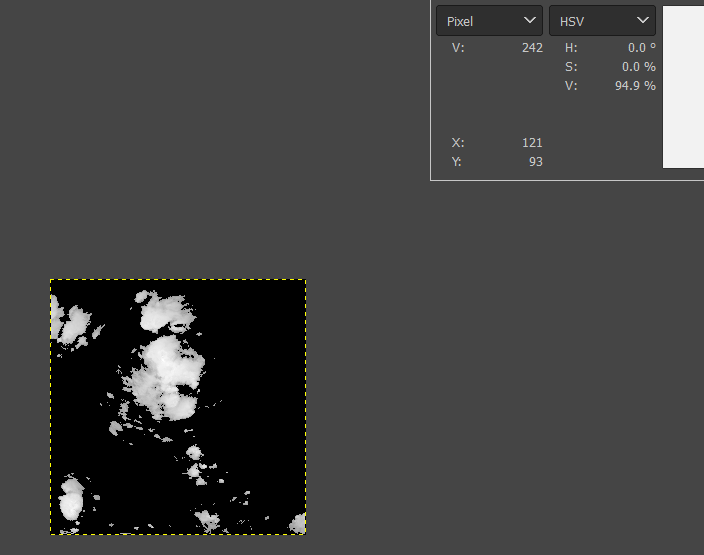

In [5]:
# Example: Check a single pixel (x, y)
x, y = 121, 93  # Pixel coordinates

# Convert pixel coordinates to Mercator (meters)
merc_x, merc_y = pixel_to_mercator(x, y, 256, 256, left, right, bottom, top)

# Convert Mercator (meters) to Lat/Lon
lat, lon = mercator_to_latlon(merc_x, merc_y)
print(lat, lon)

34.5246623012832 100.6347660403831


In [6]:
# Create a Point object
point = Point(lon, lat)

# Perform the spatial query
affected_county = counties[counties.contains(point)]

# Print the affected county
if not affected_county.empty:
    print(affected_county['name'])  # Assuming the county names are stored in a column called 'name'
else:
    print("No county affected by this pixel.")

2658    玛沁县
Name: name, dtype: object


### Go through all pixels in Satellite image

In [8]:
import cv2

# Load the satellite image
image = cv2.imread(r'D:\Tommy\++AI\himawari9\12_6_sel\SAT13_20240829122000_4_12_6.png', cv2.IMREAD_GRAYSCALE)

# Threshold for high-value pixels
threshold = 150

dict_counties={}

# Iterate over all pixels in the image
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        pixel_value = image[y, x]
        if pixel_value > threshold:
            # Convert pixel (x, y) to Lat/Lon
            merc_x, merc_y = pixel_to_mercator(x, y, image.shape[1], image.shape[0], left, right, bottom, top)
            lat, lon = mercator_to_latlon(merc_x, merc_y)
            
            # Create a Point object
            point = Point(lon, lat)
            
            # Perform the spatial query
            affected_county = counties[counties.contains(point)]
            
            if not affected_county.empty:
                cc = affected_county['name'].values[0]
                print(f"Pixel at ({x}, {y}),value is {pixel_value}, affects county: {cc}")
                if cc in dict_counties.keys():
                    count = dict_counties[cc]
                    dict_counties[cc] = count+1
                else:
                    dict_counties[cc] = 1


Pixel at (93, 11),value is 162, affects county: 金塔县
Pixel at (94, 11),value is 160, affects county: 金塔县
Pixel at (95, 11),value is 152, affects county: 金塔县
Pixel at (103, 11),value is 152, affects county: 金塔县
Pixel at (104, 11),value is 153, affects county: 金塔县
Pixel at (92, 12),value is 160, affects county: 玉门市
Pixel at (93, 12),value is 186, affects county: 金塔县
Pixel at (94, 12),value is 182, affects county: 金塔县
Pixel at (95, 12),value is 172, affects county: 金塔县
Pixel at (96, 12),value is 164, affects county: 金塔县
Pixel at (100, 12),value is 153, affects county: 金塔县
Pixel at (103, 12),value is 156, affects county: 金塔县
Pixel at (104, 12),value is 153, affects county: 金塔县
Pixel at (89, 13),value is 167, affects county: 玉门市
Pixel at (90, 13),value is 186, affects county: 玉门市
Pixel at (91, 13),value is 160, affects county: 玉门市
Pixel at (92, 13),value is 189, affects county: 玉门市
Pixel at (93, 13),value is 196, affects county: 金塔县
Pixel at (94, 13),value is 190, affects county: 金塔县
Pixel a

Pixel at (100, 20),value is 161, affects county: 肃州区
Pixel at (101, 20),value is 165, affects county: 肃南裕固族自治县
Pixel at (102, 20),value is 172, affects county: 肃南裕固族自治县
Pixel at (103, 20),value is 180, affects county: 肃南裕固族自治县
Pixel at (104, 20),value is 183, affects county: 肃南裕固族自治县
Pixel at (105, 20),value is 189, affects county: 肃南裕固族自治县
Pixel at (106, 20),value is 188, affects county: 高台县
Pixel at (107, 20),value is 179, affects county: 肃南裕固族自治县
Pixel at (108, 20),value is 173, affects county: 肃南裕固族自治县
Pixel at (112, 20),value is 158, affects county: 高台县
Pixel at (113, 20),value is 161, affects county: 高台县
Pixel at (114, 20),value is 164, affects county: 临泽县
Pixel at (115, 20),value is 166, affects county: 临泽县
Pixel at (116, 20),value is 177, affects county: 临泽县
Pixel at (117, 20),value is 171, affects county: 阿拉善右旗
Pixel at (118, 20),value is 185, affects county: 阿拉善右旗
Pixel at (119, 20),value is 177, affects county: 阿拉善右旗
Pixel at (120, 20),value is 181, affects county: 阿拉善右旗
Pix

Pixel at (8, 24),value is 153, affects county: 若羌县
Pixel at (98, 24),value is 183, affects county: 肃南裕固族自治县
Pixel at (99, 24),value is 193, affects county: 肃南裕固族自治县
Pixel at (100, 24),value is 191, affects county: 肃南裕固族自治县
Pixel at (101, 24),value is 193, affects county: 肃州区
Pixel at (102, 24),value is 191, affects county: 肃州区
Pixel at (103, 24),value is 191, affects county: 肃州区
Pixel at (104, 24),value is 189, affects county: 肃州区
Pixel at (105, 24),value is 182, affects county: 肃州区
Pixel at (106, 24),value is 199, affects county: 高台县
Pixel at (107, 24),value is 209, affects county: 肃南裕固族自治县
Pixel at (108, 24),value is 210, affects county: 高台县
Pixel at (109, 24),value is 196, affects county: 高台县
Pixel at (110, 24),value is 193, affects county: 高台县
Pixel at (111, 24),value is 187, affects county: 高台县
Pixel at (112, 24),value is 188, affects county: 高台县
Pixel at (113, 24),value is 187, affects county: 高台县
Pixel at (114, 24),value is 195, affects county: 临泽县
Pixel at (115, 24),value is 19

Pixel at (0, 28),value is 208, affects county: 若羌县
Pixel at (1, 28),value is 208, affects county: 若羌县
Pixel at (2, 28),value is 206, affects county: 若羌县
Pixel at (3, 28),value is 205, affects county: 若羌县
Pixel at (4, 28),value is 204, affects county: 若羌县
Pixel at (5, 28),value is 199, affects county: 若羌县
Pixel at (6, 28),value is 174, affects county: 若羌县
Pixel at (7, 28),value is 158, affects county: 若羌县
Pixel at (11, 28),value is 171, affects county: 若羌县
Pixel at (12, 28),value is 162, affects county: 若羌县
Pixel at (13, 28),value is 156, affects county: 若羌县
Pixel at (22, 28),value is 153, affects county: 若羌县
Pixel at (23, 28),value is 182, affects county: 若羌县
Pixel at (24, 28),value is 183, affects county: 若羌县
Pixel at (25, 28),value is 183, affects county: 若羌县
Pixel at (26, 28),value is 171, affects county: 若羌县
Pixel at (27, 28),value is 155, affects county: 阿克塞哈萨克族自治县
Pixel at (81, 28),value is 152, affects county: 天峻县
Pixel at (91, 28),value is 151, affects county: 肃南裕固族自治县
Pixel at

Pixel at (117, 30),value is 198, affects county: 甘州区
Pixel at (118, 30),value is 202, affects county: 甘州区
Pixel at (119, 30),value is 195, affects county: 甘州区
Pixel at (120, 30),value is 193, affects county: 甘州区
Pixel at (121, 30),value is 193, affects county: 甘州区
Pixel at (122, 30),value is 198, affects county: 甘州区
Pixel at (123, 30),value is 199, affects county: 山丹县
Pixel at (124, 30),value is 198, affects county: 山丹县
Pixel at (125, 30),value is 196, affects county: 阿拉善右旗
Pixel at (126, 30),value is 194, affects county: 山丹县
Pixel at (127, 30),value is 194, affects county: 山丹县
Pixel at (128, 30),value is 189, affects county: 阿拉善右旗
Pixel at (129, 30),value is 185, affects county: 阿拉善右旗
Pixel at (130, 30),value is 166, affects county: 阿拉善右旗
Pixel at (133, 30),value is 155, affects county: 阿拉善右旗
Pixel at (135, 30),value is 164, affects county: 阿拉善右旗
Pixel at (136, 30),value is 159, affects county: 阿拉善右旗
Pixel at (137, 30),value is 153, affects county: 金川区
Pixel at (138, 30),value is 161,

Pixel at (24, 33),value is 183, affects county: 茫崖市
Pixel at (25, 33),value is 192, affects county: 茫崖市
Pixel at (26, 33),value is 195, affects county: 茫崖市
Pixel at (27, 33),value is 190, affects county: 茫崖市
Pixel at (28, 33),value is 188, affects county: 茫崖市
Pixel at (29, 33),value is 189, affects county: 茫崖市
Pixel at (30, 33),value is 181, affects county: 茫崖市
Pixel at (31, 33),value is 177, affects county: 茫崖市
Pixel at (32, 33),value is 163, affects county: 茫崖市
Pixel at (36, 33),value is 156, affects county: 茫崖市
Pixel at (37, 33),value is 156, affects county: 茫崖市
Pixel at (91, 33),value is 185, affects county: 天峻县
Pixel at (92, 33),value is 191, affects county: 天峻县
Pixel at (93, 33),value is 197, affects county: 祁连县
Pixel at (94, 33),value is 208, affects county: 祁连县
Pixel at (95, 33),value is 218, affects county: 祁连县
Pixel at (96, 33),value is 220, affects county: 祁连县
Pixel at (97, 33),value is 224, affects county: 祁连县
Pixel at (98, 33),value is 224, affects county: 祁连县
Pixel at (99

Pixel at (95, 35),value is 224, affects county: 天峻县
Pixel at (96, 35),value is 225, affects county: 祁连县
Pixel at (97, 35),value is 226, affects county: 祁连县
Pixel at (98, 35),value is 226, affects county: 祁连县
Pixel at (99, 35),value is 229, affects county: 祁连县
Pixel at (100, 35),value is 228, affects county: 祁连县
Pixel at (101, 35),value is 228, affects county: 祁连县
Pixel at (102, 35),value is 226, affects county: 祁连县
Pixel at (103, 35),value is 224, affects county: 祁连县
Pixel at (104, 35),value is 225, affects county: 祁连县
Pixel at (105, 35),value is 225, affects county: 祁连县
Pixel at (106, 35),value is 226, affects county: 祁连县
Pixel at (107, 35),value is 226, affects county: 祁连县
Pixel at (108, 35),value is 223, affects county: 肃南裕固族自治县
Pixel at (109, 35),value is 221, affects county: 肃南裕固族自治县
Pixel at (110, 35),value is 219, affects county: 肃南裕固族自治县
Pixel at (111, 35),value is 218, affects county: 肃南裕固族自治县
Pixel at (112, 35),value is 216, affects county: 肃南裕固族自治县
Pixel at (113, 35),value i

Pixel at (93, 38),value is 225, affects county: 天峻县
Pixel at (94, 38),value is 226, affects county: 天峻县
Pixel at (95, 38),value is 224, affects county: 天峻县
Pixel at (96, 38),value is 227, affects county: 天峻县
Pixel at (97, 38),value is 228, affects county: 天峻县
Pixel at (98, 38),value is 229, affects county: 天峻县
Pixel at (99, 38),value is 229, affects county: 天峻县
Pixel at (100, 38),value is 230, affects county: 天峻县
Pixel at (101, 38),value is 230, affects county: 天峻县
Pixel at (102, 38),value is 230, affects county: 天峻县
Pixel at (103, 38),value is 228, affects county: 祁连县
Pixel at (104, 38),value is 231, affects county: 祁连县
Pixel at (105, 38),value is 232, affects county: 祁连县
Pixel at (106, 38),value is 230, affects county: 祁连县
Pixel at (107, 38),value is 229, affects county: 祁连县
Pixel at (108, 38),value is 229, affects county: 祁连县
Pixel at (109, 38),value is 226, affects county: 祁连县
Pixel at (110, 38),value is 228, affects county: 祁连县
Pixel at (111, 38),value is 227, affects county: 肃南裕固

Pixel at (137, 40),value is 188, affects county: 永昌县
Pixel at (138, 40),value is 185, affects county: 永昌县
Pixel at (139, 40),value is 181, affects county: 永昌县
Pixel at (140, 40),value is 163, affects county: 永昌县
Pixel at (141, 40),value is 168, affects county: 永昌县
Pixel at (142, 40),value is 166, affects county: 永昌县
Pixel at (143, 40),value is 165, affects county: 永昌县
Pixel at (0, 41),value is 189, affects county: 若羌县
Pixel at (1, 41),value is 186, affects county: 若羌县
Pixel at (2, 41),value is 172, affects county: 若羌县
Pixel at (3, 41),value is 184, affects county: 若羌县
Pixel at (4, 41),value is 191, affects county: 若羌县
Pixel at (5, 41),value is 179, affects county: 若羌县
Pixel at (6, 41),value is 183, affects county: 茫崖市
Pixel at (7, 41),value is 185, affects county: 茫崖市
Pixel at (8, 41),value is 181, affects county: 茫崖市
Pixel at (9, 41),value is 174, affects county: 茫崖市
Pixel at (21, 41),value is 184, affects county: 茫崖市
Pixel at (22, 41),value is 185, affects county: 茫崖市
Pixel at (23, 4

Pixel at (34, 43),value is 195, affects county: 茫崖市
Pixel at (35, 43),value is 192, affects county: 茫崖市
Pixel at (36, 43),value is 180, affects county: 茫崖市
Pixel at (37, 43),value is 167, affects county: 茫崖市
Pixel at (40, 43),value is 154, affects county: 茫崖市
Pixel at (90, 43),value is 179, affects county: 天峻县
Pixel at (91, 43),value is 225, affects county: 天峻县
Pixel at (92, 43),value is 228, affects county: 天峻县
Pixel at (93, 43),value is 229, affects county: 天峻县
Pixel at (94, 43),value is 226, affects county: 天峻县
Pixel at (95, 43),value is 230, affects county: 天峻县
Pixel at (96, 43),value is 229, affects county: 天峻县
Pixel at (97, 43),value is 233, affects county: 天峻县
Pixel at (98, 43),value is 231, affects county: 天峻县
Pixel at (99, 43),value is 228, affects county: 天峻县
Pixel at (100, 43),value is 227, affects county: 天峻县
Pixel at (101, 43),value is 232, affects county: 天峻县
Pixel at (102, 43),value is 234, affects county: 天峻县
Pixel at (103, 43),value is 234, affects county: 天峻县
Pixel at

Pixel at (114, 45),value is 214, affects county: 刚察县
Pixel at (115, 45),value is 151, affects county: 祁连县
Pixel at (120, 45),value is 169, affects county: 祁连县
Pixel at (121, 45),value is 206, affects county: 祁连县
Pixel at (122, 45),value is 210, affects county: 祁连县
Pixel at (123, 45),value is 207, affects county: 祁连县
Pixel at (124, 45),value is 210, affects county: 祁连县
Pixel at (125, 45),value is 199, affects county: 祁连县
Pixel at (126, 45),value is 187, affects county: 祁连县
Pixel at (133, 45),value is 151, affects county: 肃南裕固族自治县
Pixel at (134, 45),value is 151, affects county: 肃南裕固族自治县
Pixel at (136, 45),value is 175, affects county: 肃南裕固族自治县
Pixel at (137, 45),value is 173, affects county: 肃南裕固族自治县
Pixel at (138, 45),value is 167, affects county: 肃南裕固族自治县
Pixel at (139, 45),value is 167, affects county: 凉州区
Pixel at (0, 46),value is 196, affects county: 若羌县
Pixel at (1, 46),value is 197, affects county: 若羌县
Pixel at (2, 46),value is 199, affects county: 若羌县
Pixel at (3, 46),value is 2

Pixel at (28, 48),value is 210, affects county: 茫崖市
Pixel at (29, 48),value is 209, affects county: 茫崖市
Pixel at (30, 48),value is 207, affects county: 茫崖市
Pixel at (31, 48),value is 204, affects county: 茫崖市
Pixel at (32, 48),value is 201, affects county: 茫崖市
Pixel at (33, 48),value is 198, affects county: 茫崖市
Pixel at (34, 48),value is 195, affects county: 茫崖市
Pixel at (35, 48),value is 188, affects county: 茫崖市
Pixel at (36, 48),value is 151, affects county: 格尔木市
Pixel at (47, 48),value is 156, affects county: 大柴旦行政委员会
Pixel at (48, 48),value is 161, affects county: 大柴旦行政委员会
Pixel at (49, 48),value is 160, affects county: 大柴旦行政委员会
Pixel at (50, 48),value is 160, affects county: 大柴旦行政委员会
Pixel at (51, 48),value is 153, affects county: 大柴旦行政委员会
Pixel at (52, 48),value is 153, affects county: 大柴旦行政委员会
Pixel at (92, 48),value is 211, affects county: 天峻县
Pixel at (93, 48),value is 228, affects county: 天峻县
Pixel at (94, 48),value is 233, affects county: 天峻县
Pixel at (95, 48),value is 233, a

Pixel at (50, 50),value is 151, affects county: 大柴旦行政委员会
Pixel at (94, 50),value is 161, affects county: 天峻县
Pixel at (95, 50),value is 189, affects county: 天峻县
Pixel at (96, 50),value is 200, affects county: 天峻县
Pixel at (97, 50),value is 203, affects county: 天峻县
Pixel at (98, 50),value is 216, affects county: 天峻县
Pixel at (99, 50),value is 205, affects county: 天峻县
Pixel at (100, 50),value is 190, affects county: 天峻县
Pixel at (101, 50),value is 191, affects county: 天峻县
Pixel at (102, 50),value is 187, affects county: 天峻县
Pixel at (103, 50),value is 188, affects county: 天峻县
Pixel at (104, 50),value is 218, affects county: 天峻县
Pixel at (105, 50),value is 210, affects county: 天峻县
Pixel at (106, 50),value is 213, affects county: 天峻县
Pixel at (107, 50),value is 177, affects county: 天峻县
Pixel at (119, 50),value is 180, affects county: 刚察县
Pixel at (120, 50),value is 191, affects county: 海晏县
Pixel at (121, 50),value is 205, affects county: 祁连县
Pixel at (122, 50),value is 195, affects county:

Pixel at (48, 53),value is 170, affects county: 格尔木市
Pixel at (49, 53),value is 164, affects county: 格尔木市
Pixel at (102, 53),value is 152, affects county: 天峻县
Pixel at (103, 53),value is 176, affects county: 天峻县
Pixel at (104, 53),value is 152, affects county: 天峻县
Pixel at (105, 53),value is 170, affects county: 天峻县
Pixel at (106, 53),value is 163, affects county: 天峻县
Pixel at (107, 53),value is 160, affects county: 天峻县
Pixel at (124, 53),value is 166, affects county: 大通回族土族自治县
Pixel at (125, 53),value is 172, affects county: 大通回族土族自治县
Pixel at (126, 53),value is 178, affects county: 大通回族土族自治县
Pixel at (127, 53),value is 156, affects county: 大通回族土族自治县
Pixel at (128, 53),value is 156, affects county: 门源回族自治县
Pixel at (132, 53),value is 156, affects county: 门源回族自治县
Pixel at (133, 53),value is 160, affects county: 门源回族自治县
Pixel at (149, 53),value is 155, affects county: 古浪县
Pixel at (0, 54),value is 208, affects county: 若羌县
Pixel at (1, 54),value is 200, affects county: 若羌县
Pixel at (2, 5

Pixel at (43, 57),value is 187, affects county: 格尔木市
Pixel at (44, 57),value is 185, affects county: 格尔木市
Pixel at (45, 57),value is 189, affects county: 格尔木市
Pixel at (46, 57),value is 184, affects county: 格尔木市
Pixel at (111, 57),value is 156, affects county: 刚察县
Pixel at (113, 57),value is 157, affects county: 刚察县
Pixel at (114, 57),value is 174, affects county: 刚察县
Pixel at (115, 57),value is 183, affects county: 刚察县
Pixel at (116, 57),value is 172, affects county: 刚察县
Pixel at (117, 57),value is 152, affects county: 刚察县
Pixel at (118, 57),value is 174, affects county: 刚察县
Pixel at (119, 57),value is 186, affects county: 海晏县
Pixel at (120, 57),value is 192, affects county: 海晏县
Pixel at (121, 57),value is 194, affects county: 海晏县
Pixel at (122, 57),value is 192, affects county: 海晏县
Pixel at (123, 57),value is 191, affects county: 海晏县
Pixel at (124, 57),value is 190, affects county: 海晏县
Pixel at (125, 57),value is 178, affects county: 海晏县
Pixel at (0, 58),value is 161, affects county:

Pixel at (24, 61),value is 160, affects county: 格尔木市
Pixel at (28, 61),value is 174, affects county: 格尔木市
Pixel at (29, 61),value is 197, affects county: 格尔木市
Pixel at (30, 61),value is 199, affects county: 格尔木市
Pixel at (31, 61),value is 200, affects county: 格尔木市
Pixel at (32, 61),value is 196, affects county: 格尔木市
Pixel at (33, 61),value is 195, affects county: 格尔木市
Pixel at (34, 61),value is 196, affects county: 格尔木市
Pixel at (35, 61),value is 155, affects county: 格尔木市
Pixel at (105, 61),value is 169, affects county: 乌兰县
Pixel at (106, 61),value is 207, affects county: 乌兰县
Pixel at (107, 61),value is 223, affects county: 共和县
Pixel at (108, 61),value is 226, affects county: 共和县
Pixel at (109, 61),value is 225, affects county: 共和县
Pixel at (110, 61),value is 222, affects county: 共和县
Pixel at (111, 61),value is 221, affects county: 共和县
Pixel at (112, 61),value is 222, affects county: 共和县
Pixel at (113, 61),value is 222, affects county: 共和县
Pixel at (114, 61),value is 220, affects count

Pixel at (31, 64),value is 187, affects county: 格尔木市
Pixel at (32, 64),value is 187, affects county: 格尔木市
Pixel at (33, 64),value is 179, affects county: 格尔木市
Pixel at (34, 64),value is 179, affects county: 格尔木市
Pixel at (35, 64),value is 182, affects county: 格尔木市
Pixel at (36, 64),value is 172, affects county: 格尔木市
Pixel at (37, 64),value is 156, affects county: 格尔木市
Pixel at (100, 64),value is 186, affects county: 都兰县
Pixel at (101, 64),value is 205, affects county: 乌兰县
Pixel at (102, 64),value is 214, affects county: 乌兰县
Pixel at (103, 64),value is 219, affects county: 乌兰县
Pixel at (104, 64),value is 223, affects county: 乌兰县
Pixel at (105, 64),value is 224, affects county: 乌兰县
Pixel at (106, 64),value is 225, affects county: 共和县
Pixel at (107, 64),value is 226, affects county: 共和县
Pixel at (108, 64),value is 227, affects county: 共和县
Pixel at (109, 64),value is 228, affects county: 共和县
Pixel at (110, 64),value is 228, affects county: 共和县
Pixel at (111, 64),value is 228, affects count

Pixel at (110, 68),value is 233, affects county: 共和县
Pixel at (111, 68),value is 232, affects county: 共和县
Pixel at (112, 68),value is 228, affects county: 共和县
Pixel at (113, 68),value is 229, affects county: 共和县
Pixel at (114, 68),value is 225, affects county: 共和县
Pixel at (115, 68),value is 225, affects county: 共和县
Pixel at (116, 68),value is 225, affects county: 共和县
Pixel at (117, 68),value is 222, affects county: 共和县
Pixel at (118, 68),value is 223, affects county: 共和县
Pixel at (119, 68),value is 221, affects county: 共和县
Pixel at (120, 68),value is 219, affects county: 共和县
Pixel at (121, 68),value is 219, affects county: 共和县
Pixel at (122, 68),value is 215, affects county: 共和县
Pixel at (123, 68),value is 214, affects county: 共和县
Pixel at (124, 68),value is 207, affects county: 共和县
Pixel at (125, 68),value is 205, affects county: 共和县
Pixel at (126, 68),value is 198, affects county: 共和县
Pixel at (127, 68),value is 194, affects county: 共和县
Pixel at (128, 68),value is 184, affects count

Pixel at (94, 72),value is 170, affects county: 都兰县
Pixel at (95, 72),value is 182, affects county: 都兰县
Pixel at (96, 72),value is 200, affects county: 都兰县
Pixel at (97, 72),value is 197, affects county: 都兰县
Pixel at (98, 72),value is 212, affects county: 都兰县
Pixel at (99, 72),value is 231, affects county: 都兰县
Pixel at (100, 72),value is 233, affects county: 都兰县
Pixel at (101, 72),value is 235, affects county: 都兰县
Pixel at (102, 72),value is 235, affects county: 都兰县
Pixel at (103, 72),value is 231, affects county: 都兰县
Pixel at (104, 72),value is 233, affects county: 兴海县
Pixel at (105, 72),value is 232, affects county: 兴海县
Pixel at (106, 72),value is 234, affects county: 兴海县
Pixel at (107, 72),value is 235, affects county: 兴海县
Pixel at (108, 72),value is 240, affects county: 共和县
Pixel at (109, 72),value is 242, affects county: 共和县
Pixel at (110, 72),value is 240, affects county: 兴海县
Pixel at (111, 72),value is 239, affects county: 兴海县
Pixel at (112, 72),value is 236, affects county: 兴海县

Pixel at (120, 75),value is 227, affects county: 贵南县
Pixel at (121, 75),value is 225, affects county: 贵南县
Pixel at (122, 75),value is 223, affects county: 贵南县
Pixel at (123, 75),value is 221, affects county: 贵南县
Pixel at (124, 75),value is 213, affects county: 贵南县
Pixel at (125, 75),value is 201, affects county: 贵南县
Pixel at (126, 75),value is 188, affects county: 贵南县
Pixel at (127, 75),value is 181, affects county: 贵南县
Pixel at (128, 75),value is 178, affects county: 贵南县
Pixel at (129, 75),value is 166, affects county: 贵南县
Pixel at (130, 75),value is 152, affects county: 贵德县
Pixel at (131, 75),value is 152, affects county: 贵德县
Pixel at (132, 75),value is 151, affects county: 贵德县
Pixel at (135, 75),value is 156, affects county: 尖扎县
Pixel at (136, 75),value is 163, affects county: 尖扎县
Pixel at (137, 75),value is 174, affects county: 尖扎县
Pixel at (138, 75),value is 163, affects county: 循化撒拉族自治县
Pixel at (139, 75),value is 177, affects county: 循化撒拉族自治县
Pixel at (140, 75),value is 165, aff

Pixel at (101, 79),value is 210, affects county: 玛多县
Pixel at (102, 79),value is 231, affects county: 玛多县
Pixel at (103, 79),value is 233, affects county: 玛多县
Pixel at (104, 79),value is 232, affects county: 玛多县
Pixel at (105, 79),value is 234, affects county: 玛多县
Pixel at (106, 79),value is 233, affects county: 玛多县
Pixel at (107, 79),value is 230, affects county: 兴海县
Pixel at (108, 79),value is 237, affects county: 兴海县
Pixel at (109, 79),value is 237, affects county: 兴海县
Pixel at (110, 79),value is 238, affects county: 兴海县
Pixel at (111, 79),value is 244, affects county: 兴海县
Pixel at (112, 79),value is 247, affects county: 兴海县
Pixel at (113, 79),value is 245, affects county: 兴海县
Pixel at (114, 79),value is 245, affects county: 兴海县
Pixel at (115, 79),value is 243, affects county: 兴海县
Pixel at (116, 79),value is 241, affects county: 同德县
Pixel at (117, 79),value is 239, affects county: 贵南县
Pixel at (118, 79),value is 235, affects county: 贵南县
Pixel at (119, 79),value is 232, affects count

Pixel at (95, 83),value is 174, affects county: 玛多县
Pixel at (96, 83),value is 182, affects county: 玛多县
Pixel at (97, 83),value is 175, affects county: 玛多县
Pixel at (98, 83),value is 180, affects county: 玛多县
Pixel at (99, 83),value is 187, affects county: 玛多县
Pixel at (100, 83),value is 189, affects county: 玛多县
Pixel at (101, 83),value is 200, affects county: 玛多县
Pixel at (102, 83),value is 210, affects county: 玛多县
Pixel at (103, 83),value is 207, affects county: 玛多县
Pixel at (104, 83),value is 217, affects county: 玛多县
Pixel at (105, 83),value is 225, affects county: 兴海县
Pixel at (106, 83),value is 231, affects county: 兴海县
Pixel at (107, 83),value is 233, affects county: 兴海县
Pixel at (108, 83),value is 235, affects county: 兴海县
Pixel at (109, 83),value is 236, affects county: 兴海县
Pixel at (110, 83),value is 238, affects county: 兴海县
Pixel at (111, 83),value is 240, affects county: 兴海县
Pixel at (112, 83),value is 245, affects county: 兴海县
Pixel at (113, 83),value is 245, affects county: 兴海

Pixel at (148, 86),value is 204, affects county: 合作市
Pixel at (149, 86),value is 203, affects county: 合作市
Pixel at (150, 86),value is 200, affects county: 合作市
Pixel at (151, 86),value is 185, affects county: 合作市
Pixel at (152, 86),value is 165, affects county: 合作市
Pixel at (153, 86),value is 152, affects county: 卓尼县
Pixel at (68, 87),value is 166, affects county: 曲麻莱县
Pixel at (69, 87),value is 164, affects county: 曲麻莱县
Pixel at (91, 87),value is 156, affects county: 玛多县
Pixel at (92, 87),value is 158, affects county: 玛多县
Pixel at (97, 87),value is 155, affects county: 玛多县
Pixel at (98, 87),value is 171, affects county: 玛多县
Pixel at (99, 87),value is 185, affects county: 玛多县
Pixel at (100, 87),value is 192, affects county: 玛多县
Pixel at (101, 87),value is 191, affects county: 玛多县
Pixel at (102, 87),value is 205, affects county: 玛多县
Pixel at (103, 87),value is 209, affects county: 玛沁县
Pixel at (104, 87),value is 208, affects county: 玛沁县
Pixel at (105, 87),value is 211, affects county: 玛沁

Pixel at (140, 89),value is 217, affects county: 碌曲县
Pixel at (141, 89),value is 217, affects county: 夏河县
Pixel at (142, 89),value is 217, affects county: 夏河县
Pixel at (143, 89),value is 217, affects county: 夏河县
Pixel at (144, 89),value is 217, affects county: 夏河县
Pixel at (145, 89),value is 215, affects county: 夏河县
Pixel at (146, 89),value is 210, affects county: 夏河县
Pixel at (147, 89),value is 208, affects county: 夏河县
Pixel at (148, 89),value is 201, affects county: 合作市
Pixel at (149, 89),value is 193, affects county: 合作市
Pixel at (150, 89),value is 171, affects county: 卓尼县
Pixel at (68, 90),value is 151, affects county: 曲麻莱县
Pixel at (82, 90),value is 168, affects county: 玛多县
Pixel at (83, 90),value is 169, affects county: 玛多县
Pixel at (84, 90),value is 163, affects county: 玛多县
Pixel at (86, 90),value is 152, affects county: 玛多县
Pixel at (87, 90),value is 151, affects county: 玛多县
Pixel at (90, 90),value is 164, affects county: 玛多县
Pixel at (91, 90),value is 168, affects county: 玛多县


Pixel at (81, 93),value is 158, affects county: 称多县
Pixel at (83, 93),value is 169, affects county: 玛多县
Pixel at (84, 93),value is 176, affects county: 玛多县
Pixel at (85, 93),value is 179, affects county: 玛多县
Pixel at (86, 93),value is 173, affects county: 玛多县
Pixel at (87, 93),value is 174, affects county: 玛多县
Pixel at (88, 93),value is 161, affects county: 玛多县
Pixel at (89, 93),value is 179, affects county: 玛多县
Pixel at (90, 93),value is 164, affects county: 玛多县
Pixel at (91, 93),value is 184, affects county: 玛多县
Pixel at (92, 93),value is 189, affects county: 玛多县
Pixel at (93, 93),value is 180, affects county: 玛多县
Pixel at (94, 93),value is 183, affects county: 玛多县
Pixel at (95, 93),value is 192, affects county: 玛多县
Pixel at (96, 93),value is 182, affects county: 玛多县
Pixel at (97, 93),value is 175, affects county: 玛多县
Pixel at (98, 93),value is 173, affects county: 玛多县
Pixel at (99, 93),value is 172, affects county: 玛多县
Pixel at (100, 93),value is 172, affects county: 玛多县
Pixel at (1

Pixel at (137, 95),value is 231, affects county: 河南蒙古族自治县
Pixel at (138, 95),value is 229, affects county: 河南蒙古族自治县
Pixel at (139, 95),value is 230, affects county: 河南蒙古族自治县
Pixel at (140, 95),value is 232, affects county: 碌曲县
Pixel at (141, 95),value is 233, affects county: 碌曲县
Pixel at (142, 95),value is 234, affects county: 碌曲县
Pixel at (143, 95),value is 231, affects county: 碌曲县
Pixel at (144, 95),value is 226, affects county: 碌曲县
Pixel at (145, 95),value is 219, affects county: 碌曲县
Pixel at (146, 95),value is 215, affects county: 卓尼县
Pixel at (147, 95),value is 211, affects county: 卓尼县
Pixel at (148, 95),value is 198, affects county: 卓尼县
Pixel at (149, 95),value is 170, affects county: 卓尼县
Pixel at (150, 95),value is 164, affects county: 卓尼县
Pixel at (151, 95),value is 156, affects county: 卓尼县
Pixel at (152, 95),value is 169, affects county: 卓尼县
Pixel at (81, 96),value is 152, affects county: 称多县
Pixel at (82, 96),value is 163, affects county: 称多县
Pixel at (83, 96),value is 169, a

Pixel at (119, 98),value is 233, affects county: 甘德县
Pixel at (120, 98),value is 236, affects county: 甘德县
Pixel at (121, 98),value is 242, affects county: 甘德县
Pixel at (122, 98),value is 236, affects county: 甘德县
Pixel at (123, 98),value is 232, affects county: 玛曲县
Pixel at (124, 98),value is 231, affects county: 玛曲县
Pixel at (125, 98),value is 234, affects county: 玛曲县
Pixel at (126, 98),value is 234, affects county: 玛曲县
Pixel at (127, 98),value is 229, affects county: 玛曲县
Pixel at (128, 98),value is 228, affects county: 玛曲县
Pixel at (129, 98),value is 229, affects county: 玛曲县
Pixel at (130, 98),value is 231, affects county: 玛曲县
Pixel at (131, 98),value is 227, affects county: 玛曲县
Pixel at (132, 98),value is 229, affects county: 玛曲县
Pixel at (133, 98),value is 230, affects county: 河南蒙古族自治县
Pixel at (134, 98),value is 229, affects county: 河南蒙古族自治县
Pixel at (135, 98),value is 230, affects county: 河南蒙古族自治县
Pixel at (136, 98),value is 230, affects county: 河南蒙古族自治县
Pixel at (137, 98),value i

Pixel at (99, 101),value is 211, affects county: 达日县
Pixel at (100, 101),value is 213, affects county: 达日县
Pixel at (101, 101),value is 214, affects county: 达日县
Pixel at (102, 101),value is 215, affects county: 达日县
Pixel at (103, 101),value is 213, affects county: 达日县
Pixel at (104, 101),value is 213, affects county: 玛沁县
Pixel at (105, 101),value is 210, affects county: 玛沁县
Pixel at (106, 101),value is 217, affects county: 玛沁县
Pixel at (107, 101),value is 217, affects county: 玛沁县
Pixel at (108, 101),value is 214, affects county: 玛沁县
Pixel at (109, 101),value is 219, affects county: 甘德县
Pixel at (110, 101),value is 212, affects county: 甘德县
Pixel at (111, 101),value is 219, affects county: 甘德县
Pixel at (112, 101),value is 226, affects county: 甘德县
Pixel at (113, 101),value is 232, affects county: 甘德县
Pixel at (114, 101),value is 236, affects county: 甘德县
Pixel at (115, 101),value is 239, affects county: 甘德县
Pixel at (116, 101),value is 236, affects county: 甘德县
Pixel at (117, 101),value is 

Pixel at (105, 104),value is 196, affects county: 达日县
Pixel at (106, 104),value is 188, affects county: 达日县
Pixel at (107, 104),value is 179, affects county: 达日县
Pixel at (108, 104),value is 178, affects county: 达日县
Pixel at (109, 104),value is 197, affects county: 达日县
Pixel at (110, 104),value is 200, affects county: 达日县
Pixel at (111, 104),value is 211, affects county: 达日县
Pixel at (112, 104),value is 216, affects county: 达日县
Pixel at (113, 104),value is 221, affects county: 甘德县
Pixel at (114, 104),value is 232, affects county: 甘德县
Pixel at (115, 104),value is 229, affects county: 甘德县
Pixel at (116, 104),value is 229, affects county: 甘德县
Pixel at (117, 104),value is 223, affects county: 达日县
Pixel at (118, 104),value is 213, affects county: 达日县
Pixel at (119, 104),value is 203, affects county: 达日县
Pixel at (120, 104),value is 200, affects county: 久治县
Pixel at (121, 104),value is 216, affects county: 久治县
Pixel at (122, 104),value is 221, affects county: 久治县
Pixel at (123, 104),value is

Pixel at (110, 107),value is 188, affects county: 达日县
Pixel at (111, 107),value is 206, affects county: 达日县
Pixel at (112, 107),value is 223, affects county: 达日县
Pixel at (113, 107),value is 229, affects county: 达日县
Pixel at (114, 107),value is 228, affects county: 达日县
Pixel at (115, 107),value is 227, affects county: 达日县
Pixel at (116, 107),value is 226, affects county: 达日县
Pixel at (117, 107),value is 223, affects county: 达日县
Pixel at (118, 107),value is 225, affects county: 久治县
Pixel at (119, 107),value is 232, affects county: 久治县
Pixel at (120, 107),value is 217, affects county: 久治县
Pixel at (121, 107),value is 210, affects county: 久治县
Pixel at (122, 107),value is 200, affects county: 久治县
Pixel at (123, 107),value is 201, affects county: 久治县
Pixel at (124, 107),value is 182, affects county: 久治县
Pixel at (125, 107),value is 187, affects county: 久治县
Pixel at (127, 107),value is 154, affects county: 久治县
Pixel at (139, 107),value is 154, affects county: 玛曲县
Pixel at (140, 107),value is

Pixel at (90, 110),value is 207, affects county: 石渠县
Pixel at (91, 110),value is 207, affects county: 石渠县
Pixel at (92, 110),value is 205, affects county: 石渠县
Pixel at (93, 110),value is 202, affects county: 石渠县
Pixel at (94, 110),value is 206, affects county: 石渠县
Pixel at (95, 110),value is 208, affects county: 石渠县
Pixel at (96, 110),value is 203, affects county: 石渠县
Pixel at (97, 110),value is 196, affects county: 石渠县
Pixel at (98, 110),value is 206, affects county: 石渠县
Pixel at (99, 110),value is 207, affects county: 石渠县
Pixel at (100, 110),value is 205, affects county: 达日县
Pixel at (101, 110),value is 198, affects county: 达日县
Pixel at (102, 110),value is 197, affects county: 达日县
Pixel at (103, 110),value is 194, affects county: 达日县
Pixel at (104, 110),value is 194, affects county: 达日县
Pixel at (105, 110),value is 160, affects county: 达日县
Pixel at (106, 110),value is 210, affects county: 达日县
Pixel at (107, 110),value is 204, affects county: 达日县
Pixel at (108, 110),value is 195, affe

Pixel at (105, 113),value is 203, affects county: 达日县
Pixel at (106, 113),value is 203, affects county: 达日县
Pixel at (107, 113),value is 200, affects county: 达日县
Pixel at (108, 113),value is 202, affects county: 达日县
Pixel at (109, 113),value is 196, affects county: 达日县
Pixel at (110, 113),value is 198, affects county: 达日县
Pixel at (111, 113),value is 183, affects county: 达日县
Pixel at (112, 113),value is 169, affects county: 达日县
Pixel at (113, 113),value is 163, affects county: 班玛县
Pixel at (114, 113),value is 170, affects county: 班玛县
Pixel at (115, 113),value is 192, affects county: 班玛县
Pixel at (116, 113),value is 208, affects county: 班玛县
Pixel at (117, 113),value is 208, affects county: 班玛县
Pixel at (118, 113),value is 220, affects county: 班玛县
Pixel at (119, 113),value is 217, affects county: 班玛县
Pixel at (120, 113),value is 219, affects county: 班玛县
Pixel at (121, 113),value is 214, affects county: 班玛县
Pixel at (122, 113),value is 213, affects county: 班玛县
Pixel at (123, 113),value is

Pixel at (112, 116),value is 185, affects county: 色达县
Pixel at (113, 116),value is 187, affects county: 色达县
Pixel at (114, 116),value is 193, affects county: 色达县
Pixel at (115, 116),value is 204, affects county: 色达县
Pixel at (116, 116),value is 209, affects county: 班玛县
Pixel at (117, 116),value is 209, affects county: 班玛县
Pixel at (118, 116),value is 208, affects county: 班玛县
Pixel at (119, 116),value is 208, affects county: 班玛县
Pixel at (120, 116),value is 222, affects county: 班玛县
Pixel at (121, 116),value is 221, affects county: 班玛县
Pixel at (122, 116),value is 224, affects county: 班玛县
Pixel at (123, 116),value is 224, affects county: 班玛县
Pixel at (124, 116),value is 222, affects county: 班玛县
Pixel at (125, 116),value is 221, affects county: 班玛县
Pixel at (126, 116),value is 216, affects county: 班玛县
Pixel at (127, 116),value is 216, affects county: 班玛县
Pixel at (128, 116),value is 188, affects county: 阿坝县
Pixel at (129, 116),value is 173, affects county: 阿坝县
Pixel at (130, 116),value is

Pixel at (102, 120),value is 190, affects county: 德格县
Pixel at (103, 120),value is 182, affects county: 德格县
Pixel at (104, 120),value is 191, affects county: 德格县
Pixel at (105, 120),value is 189, affects county: 德格县
Pixel at (106, 120),value is 181, affects county: 甘孜县
Pixel at (107, 120),value is 177, affects county: 甘孜县
Pixel at (108, 120),value is 180, affects county: 甘孜县
Pixel at (109, 120),value is 188, affects county: 甘孜县
Pixel at (110, 120),value is 190, affects county: 甘孜县
Pixel at (111, 120),value is 205, affects county: 色达县
Pixel at (112, 120),value is 206, affects county: 色达县
Pixel at (113, 120),value is 208, affects county: 色达县
Pixel at (114, 120),value is 213, affects county: 色达县
Pixel at (115, 120),value is 217, affects county: 色达县
Pixel at (116, 120),value is 221, affects county: 色达县
Pixel at (117, 120),value is 227, affects county: 色达县
Pixel at (118, 120),value is 227, affects county: 色达县
Pixel at (119, 120),value is 229, affects county: 色达县
Pixel at (120, 120),value is

Pixel at (128, 123),value is 201, affects county: 壤塘县
Pixel at (129, 123),value is 196, affects county: 壤塘县
Pixel at (130, 123),value is 201, affects county: 壤塘县
Pixel at (131, 123),value is 207, affects county: 马尔康市
Pixel at (132, 123),value is 207, affects county: 马尔康市
Pixel at (133, 123),value is 210, affects county: 马尔康市
Pixel at (134, 123),value is 211, affects county: 马尔康市
Pixel at (135, 123),value is 215, affects county: 红原县
Pixel at (136, 123),value is 216, affects county: 红原县
Pixel at (137, 123),value is 217, affects county: 马尔康市
Pixel at (138, 123),value is 218, affects county: 红原县
Pixel at (139, 123),value is 211, affects county: 红原县
Pixel at (140, 123),value is 209, affects county: 红原县
Pixel at (141, 123),value is 206, affects county: 红原县
Pixel at (142, 123),value is 205, affects county: 红原县
Pixel at (143, 123),value is 206, affects county: 红原县
Pixel at (144, 123),value is 192, affects county: 松潘县
Pixel at (145, 123),value is 189, affects county: 黑水县
Pixel at (146, 123),val

Pixel at (103, 127),value is 188, affects county: 德格县
Pixel at (104, 127),value is 198, affects county: 德格县
Pixel at (105, 127),value is 200, affects county: 德格县
Pixel at (106, 127),value is 205, affects county: 德格县
Pixel at (107, 127),value is 194, affects county: 德格县
Pixel at (108, 127),value is 188, affects county: 德格县
Pixel at (109, 127),value is 173, affects county: 德格县
Pixel at (110, 127),value is 164, affects county: 甘孜县
Pixel at (111, 127),value is 161, affects county: 甘孜县
Pixel at (112, 127),value is 161, affects county: 甘孜县
Pixel at (113, 127),value is 161, affects county: 色达县
Pixel at (114, 127),value is 155, affects county: 色达县
Pixel at (115, 127),value is 171, affects county: 色达县
Pixel at (116, 127),value is 197, affects county: 甘孜县
Pixel at (117, 127),value is 214, affects county: 色达县
Pixel at (118, 127),value is 217, affects county: 色达县
Pixel at (119, 127),value is 220, affects county: 色达县
Pixel at (120, 127),value is 222, affects county: 色达县
Pixel at (121, 127),value is

Pixel at (105, 131),value is 176, affects county: 德格县
Pixel at (106, 131),value is 175, affects county: 德格县
Pixel at (107, 131),value is 173, affects county: 德格县
Pixel at (108, 131),value is 179, affects county: 德格县
Pixel at (109, 131),value is 175, affects county: 甘孜县
Pixel at (110, 131),value is 158, affects county: 甘孜县
Pixel at (111, 131),value is 171, affects county: 甘孜县
Pixel at (114, 131),value is 166, affects county: 甘孜县
Pixel at (115, 131),value is 159, affects county: 甘孜县
Pixel at (116, 131),value is 172, affects county: 甘孜县
Pixel at (117, 131),value is 189, affects county: 炉霍县
Pixel at (118, 131),value is 197, affects county: 炉霍县
Pixel at (119, 131),value is 203, affects county: 炉霍县
Pixel at (120, 131),value is 206, affects county: 色达县
Pixel at (121, 131),value is 208, affects county: 炉霍县
Pixel at (122, 131),value is 207, affects county: 炉霍县
Pixel at (123, 131),value is 208, affects county: 炉霍县
Pixel at (124, 131),value is 208, affects county: 炉霍县
Pixel at (125, 131),value is

Pixel at (109, 135),value is 170, affects county: 新龙县
Pixel at (111, 135),value is 154, affects county: 新龙县
Pixel at (114, 135),value is 155, affects county: 新龙县
Pixel at (115, 135),value is 169, affects county: 新龙县
Pixel at (116, 135),value is 173, affects county: 新龙县
Pixel at (117, 135),value is 172, affects county: 新龙县
Pixel at (118, 135),value is 178, affects county: 炉霍县
Pixel at (119, 135),value is 183, affects county: 炉霍县
Pixel at (120, 135),value is 191, affects county: 炉霍县
Pixel at (121, 135),value is 191, affects county: 炉霍县
Pixel at (122, 135),value is 193, affects county: 炉霍县
Pixel at (123, 135),value is 195, affects county: 炉霍县
Pixel at (124, 135),value is 200, affects county: 炉霍县
Pixel at (125, 135),value is 205, affects county: 炉霍县
Pixel at (126, 135),value is 212, affects county: 道孚县
Pixel at (127, 135),value is 215, affects county: 道孚县
Pixel at (128, 135),value is 217, affects county: 道孚县
Pixel at (129, 135),value is 219, affects county: 金川县
Pixel at (130, 135),value is

Pixel at (107, 140),value is 173, affects county: 白玉县
Pixel at (108, 140),value is 170, affects county: 白玉县
Pixel at (109, 140),value is 174, affects county: 白玉县
Pixel at (110, 140),value is 172, affects county: 白玉县
Pixel at (111, 140),value is 151, affects county: 白玉县
Pixel at (120, 140),value is 163, affects county: 新龙县
Pixel at (121, 140),value is 165, affects county: 新龙县
Pixel at (122, 140),value is 167, affects county: 道孚县
Pixel at (123, 140),value is 172, affects county: 炉霍县
Pixel at (124, 140),value is 186, affects county: 道孚县
Pixel at (125, 140),value is 183, affects county: 道孚县
Pixel at (126, 140),value is 175, affects county: 道孚县
Pixel at (127, 140),value is 181, affects county: 道孚县
Pixel at (128, 140),value is 192, affects county: 道孚县
Pixel at (129, 140),value is 179, affects county: 丹巴县
Pixel at (75, 141),value is 158, affects county: 类乌齐县
Pixel at (84, 141),value is 167, affects county: 卡若区
Pixel at (85, 141),value is 161, affects county: 察雅县
Pixel at (86, 141),value is 17

Pixel at (102, 151),value is 163, affects county: 芒康县
Pixel at (134, 151),value is 162, affects county: 康定市
Pixel at (135, 151),value is 201, affects county: 康定市
Pixel at (136, 151),value is 196, affects county: 康定市
Pixel at (137, 151),value is 152, affects county: 康定市
Pixel at (138, 151),value is 176, affects county: 康定市
Pixel at (139, 151),value is 205, affects county: 康定市
Pixel at (140, 151),value is 204, affects county: 康定市
Pixel at (141, 151),value is 197, affects county: 天全县
Pixel at (142, 151),value is 159, affects county: 天全县
Pixel at (60, 152),value is 162, affects county: 波密县
Pixel at (61, 152),value is 173, affects county: 波密县
Pixel at (62, 152),value is 175, affects county: 波密县
Pixel at (63, 152),value is 179, affects county: 波密县
Pixel at (64, 152),value is 176, affects county: 波密县
Pixel at (65, 152),value is 164, affects county: 波密县
Pixel at (100, 152),value is 181, affects county: 芒康县
Pixel at (101, 152),value is 178, affects county: 芒康县
Pixel at (102, 152),value is 154, 

Pixel at (152, 175),value is 190, affects county: 雷波县
Pixel at (153, 175),value is 168, affects county: 雷波县
Pixel at (139, 176),value is 161, affects county: 冕宁县
Pixel at (140, 176),value is 163, affects county: 冕宁县
Pixel at (141, 176),value is 164, affects county: 喜德县
Pixel at (142, 176),value is 187, affects county: 喜德县
Pixel at (143, 176),value is 196, affects county: 喜德县
Pixel at (144, 176),value is 198, affects county: 喜德县
Pixel at (145, 176),value is 211, affects county: 昭觉县
Pixel at (146, 176),value is 213, affects county: 昭觉县
Pixel at (147, 176),value is 212, affects county: 美姑县
Pixel at (148, 176),value is 195, affects county: 美姑县
Pixel at (149, 176),value is 180, affects county: 美姑县
Pixel at (152, 176),value is 177, affects county: 雷波县
Pixel at (153, 176),value is 158, affects county: 雷波县
Pixel at (124, 177),value is 155, affects county: 木里藏族自治县
Pixel at (139, 177),value is 155, affects county: 冕宁县
Pixel at (140, 177),value is 152, affects county: 冕宁县
Pixel at (141, 177),valu

Pixel at (132, 194),value is 161, affects county: 盐边县
Pixel at (133, 194),value is 165, affects county: 盐边县
Pixel at (134, 194),value is 165, affects county: 米易县
Pixel at (135, 194),value is 158, affects county: 米易县
Pixel at (136, 194),value is 164, affects county: 米易县
Pixel at (137, 194),value is 170, affects county: 米易县
Pixel at (138, 194),value is 177, affects county: 米易县
Pixel at (139, 194),value is 181, affects county: 会理市
Pixel at (140, 194),value is 184, affects county: 会理市
Pixel at (141, 194),value is 199, affects county: 会理市
Pixel at (142, 194),value is 218, affects county: 会理市
Pixel at (143, 194),value is 226, affects county: 会理市
Pixel at (144, 194),value is 224, affects county: 宁南县
Pixel at (145, 194),value is 221, affects county: 会东县
Pixel at (146, 194),value is 217, affects county: 宁南县
Pixel at (147, 194),value is 213, affects county: 巧家县
Pixel at (148, 194),value is 159, affects county: 巧家县
Pixel at (138, 195),value is 153, affects county: 米易县
Pixel at (139, 195),value is

Pixel at (183, 218),value is 153, affects county: 望谟县
Pixel at (184, 218),value is 169, affects county: 望谟县
Pixel at (185, 218),value is 173, affects county: 望谟县
Pixel at (186, 218),value is 163, affects county: 望谟县
Pixel at (183, 219),value is 162, affects county: 望谟县
Pixel at (184, 219),value is 165, affects county: 乐业县
Pixel at (185, 219),value is 162, affects county: 乐业县
Pixel at (197, 219),value is 158, affects county: 天峨县
Pixel at (182, 220),value is 159, affects county: 册亨县
Pixel at (183, 220),value is 158, affects county: 册亨县
Pixel at (184, 220),value is 159, affects county: 册亨县
Pixel at (180, 221),value is 152, affects county: 册亨县
Pixel at (182, 221),value is 156, affects county: 册亨县
Pixel at (183, 221),value is 159, affects county: 册亨县
Pixel at (180, 222),value is 153, affects county: 田林县
Pixel at (195, 222),value is 174, affects county: 凤山县
Pixel at (196, 222),value is 179, affects county: 凤山县
Pixel at (197, 222),value is 162, affects county: 东兰县
Pixel at (189, 223),value is

Pixel at (149, 240),value is 151, affects county: 个旧市
Pixel at (150, 240),value is 180, affects county: 个旧市
Pixel at (151, 240),value is 197, affects county: 蒙自市
Pixel at (152, 240),value is 198, affects county: 蒙自市
Pixel at (153, 240),value is 199, affects county: 蒙自市
Pixel at (154, 240),value is 200, affects county: 蒙自市
Pixel at (155, 240),value is 199, affects county: 蒙自市
Pixel at (156, 240),value is 199, affects county: 屏边苗族自治县
Pixel at (157, 240),value is 197, affects county: 屏边苗族自治县
Pixel at (158, 240),value is 193, affects county: 屏边苗族自治县
Pixel at (159, 240),value is 192, affects county: 文山市
Pixel at (160, 240),value is 195, affects county: 文山市
Pixel at (161, 240),value is 201, affects county: 文山市
Pixel at (162, 240),value is 197, affects county: 文山市
Pixel at (163, 240),value is 192, affects county: 文山市
Pixel at (164, 240),value is 183, affects county: 文山市
Pixel at (165, 240),value is 194, affects county: 西畴县
Pixel at (166, 240),value is 180, affects county: 西畴县
Pixel at (167, 2

Pixel at (163, 245),value is 156, affects county: 马关县
Pixel at (164, 245),value is 152, affects county: 马关县
Pixel at (165, 245),value is 152, affects county: 马关县
Pixel at (239, 245),value is 168, affects county: 岑溪市
Pixel at (240, 245),value is 168, affects county: 岑溪市
Pixel at (241, 245),value is 175, affects county: 岑溪市
Pixel at (242, 245),value is 171, affects county: 岑溪市
Pixel at (243, 245),value is 165, affects county: 罗定市
Pixel at (244, 245),value is 175, affects county: 罗定市
Pixel at (245, 245),value is 179, affects county: 罗定市
Pixel at (246, 245),value is 185, affects county: 郁南县
Pixel at (247, 245),value is 188, affects county: 郁南县
Pixel at (248, 245),value is 190, affects county: 云安区
Pixel at (249, 245),value is 192, affects county: 云安区
Pixel at (250, 245),value is 194, affects county: 云安区
Pixel at (251, 245),value is 195, affects county: 云城区
Pixel at (252, 245),value is 191, affects county: 云城区
Pixel at (253, 245),value is 188, affects county: 新兴县
Pixel at (254, 245),value is

In [9]:
print(dict_counties)

{'金塔县': 60, '玉门市': 39, '若羌县': 411, '嘉峪关市': 21, '肃州区': 32, '阿拉善右旗': 203, '高台县': 63, '肃南裕固族自治县': 267, '肃北蒙古族自治县': 6, '临泽县': 46, '甘州区': 62, '阿克塞哈萨克族自治县': 2, '民勤县': 14, '天峻县': 264, '茫崖市': 617, '祁连县': 219, '山丹县': 59, '金川区': 46, '民乐县': 39, '永昌县': 76, '中农发山丹马场': 27, '凉州区': 7, '刚察县': 52, '大柴旦行政委员会': 19, '门源回族自治县': 55, '格尔木市': 306, '天祝藏族自治县': 17, '海晏县': 51, '大通回族土族自治县': 9, '古浪县': 3, '共和县': 254, '互助土族自治县': 8, '乌兰县': 24, '湟源县': 23, '湟中区': 9, '都兰县': 197, '城北区': 1, '城西区': 1, '平安区': 1, '乐都区': 5, '贵德县': 41, '兴海县': 196, '化隆回族自治县': 37, '民和回族土族自治县': 7, '贵南县': 106, '尖扎县': 19, '循化撒拉族自治县': 20, '治多县': 12, '积石山保安族东乡族撒拉族自治县': 15, '临夏县': 18, '东乡族自治县': 6, '玛多县': 285, '同仁市': 44, '同德县': 73, '夏河县': 100, '安定区': 1, '泽库县': 103, '和政县': 9, '广河县': 4, '康乐县': 3, '太子山天然林保护区': 10, '合作市': 32, '玛沁县': 203, '卓尼县': 38, '曲麻莱县': 35, '河南蒙古族自治县': 105, '碌曲县': 68, '临潭县': 2, '称多县': 150, '甘德县': 109, '玛曲县': 119, '若尔盖县': 90, '迭部县': 3, '石渠县': 331, '达日县': 220, '久治县': 92, '玉树市': 38, '班玛县': 93, '红原县': 72, '阿坝县': 80, '杂多县': 27, '色达县': 130, '甘孜

### Georeference Image then load Into QGIS

- Generate world file
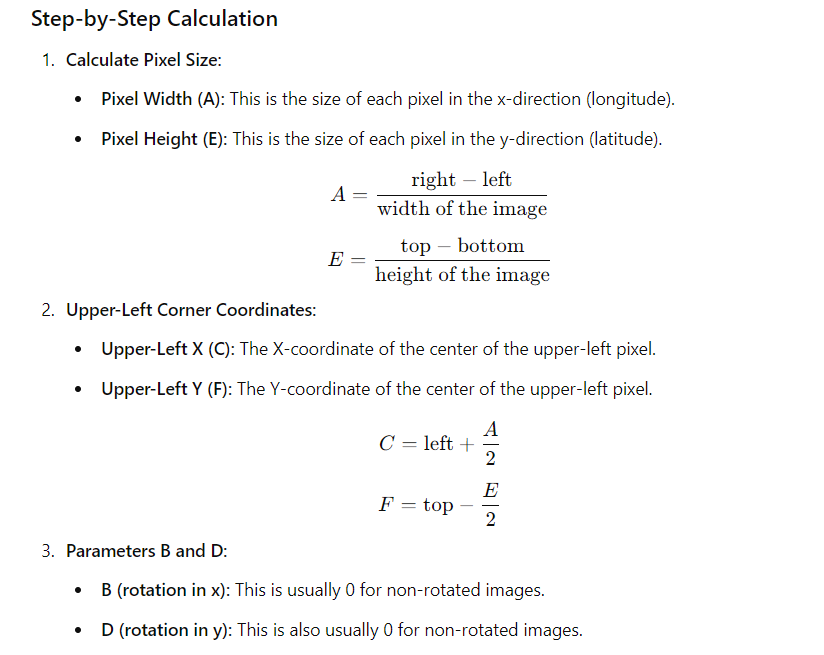

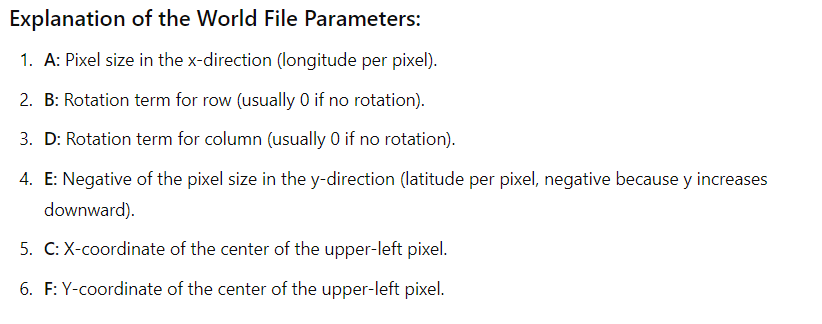

In [11]:
# Given boundary and image size
left, right, bottom, top = 10018754, 12523443, 2504689, 5009377
width = 256
height = 256

# Calculate pixel size
A = (right - left) / width
E = (top - bottom) / height

# Upper-left corner coordinates
C = left + A / 2
F = top - E / 2

# B and D are typically 0 for non-rotated images
B = 0
D = 0

# World file content
world_file_content = f"{A}\n{B}\n{D}\n{-E}\n{C}\n{F}\n"

# Write to a world file (with .wld extension)
with open(r'D:\Tommy\++AI\himawari9\SAT13_12_6.pgw', 'w') as file:
    file.write(world_file_content)

print("World file created successfully.")

World file created successfully.


### County Polygon Ontop Satellite Image
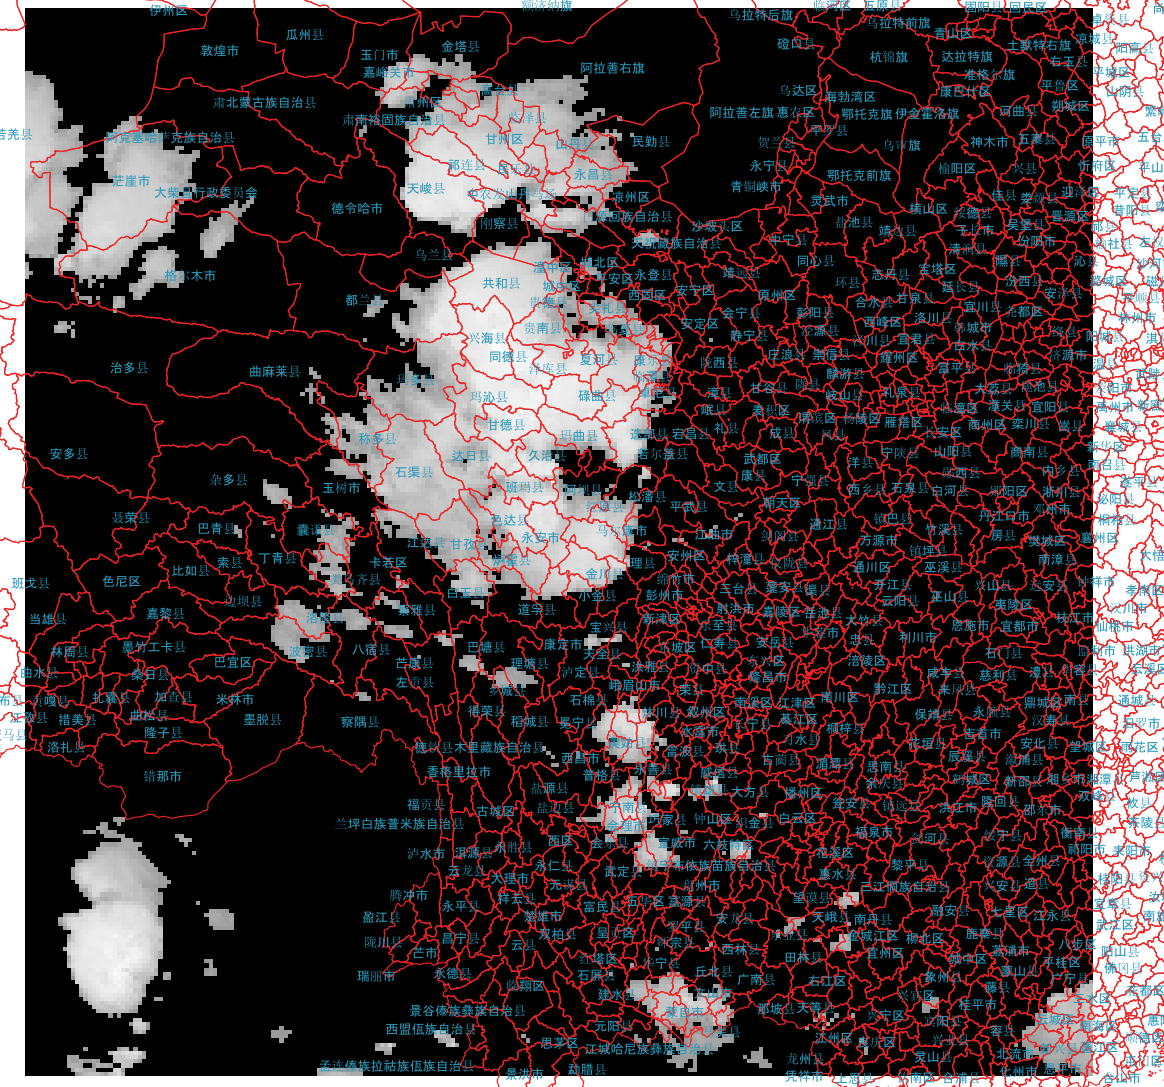


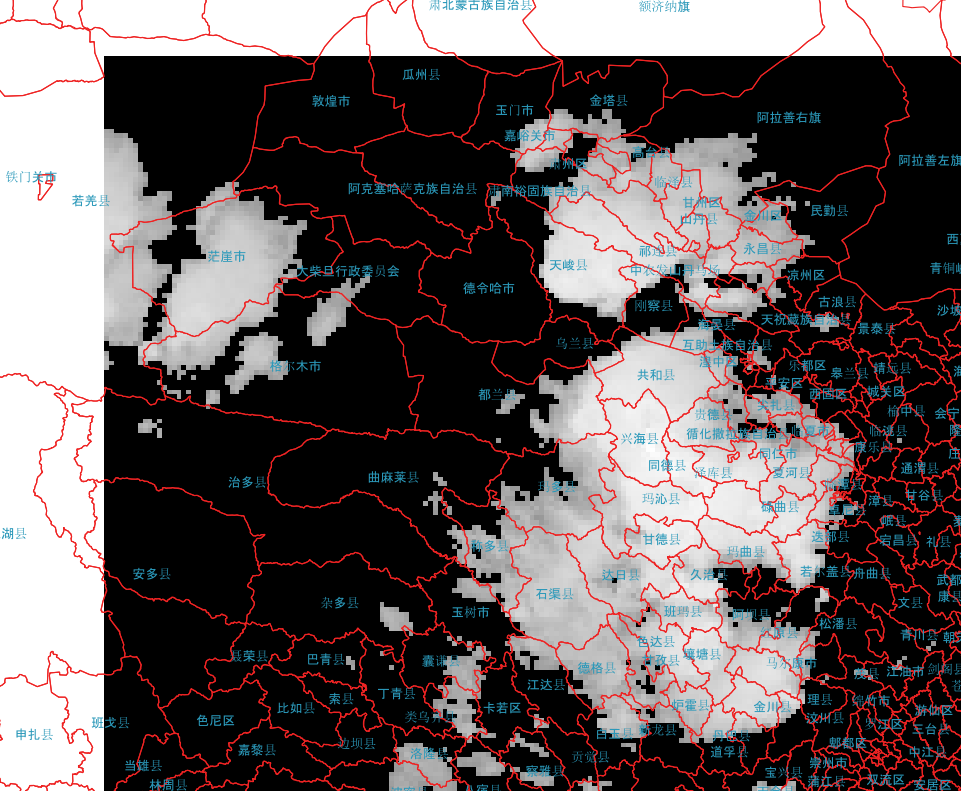

### Make it into Color

#### Define Color Ramp
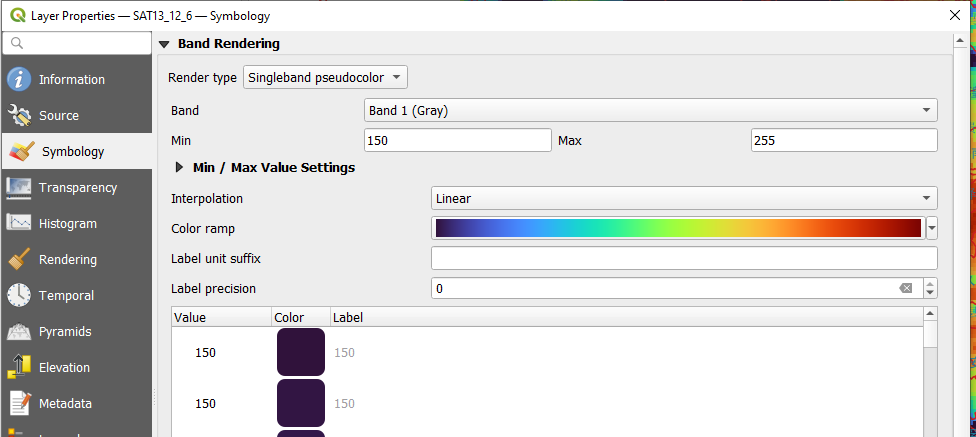

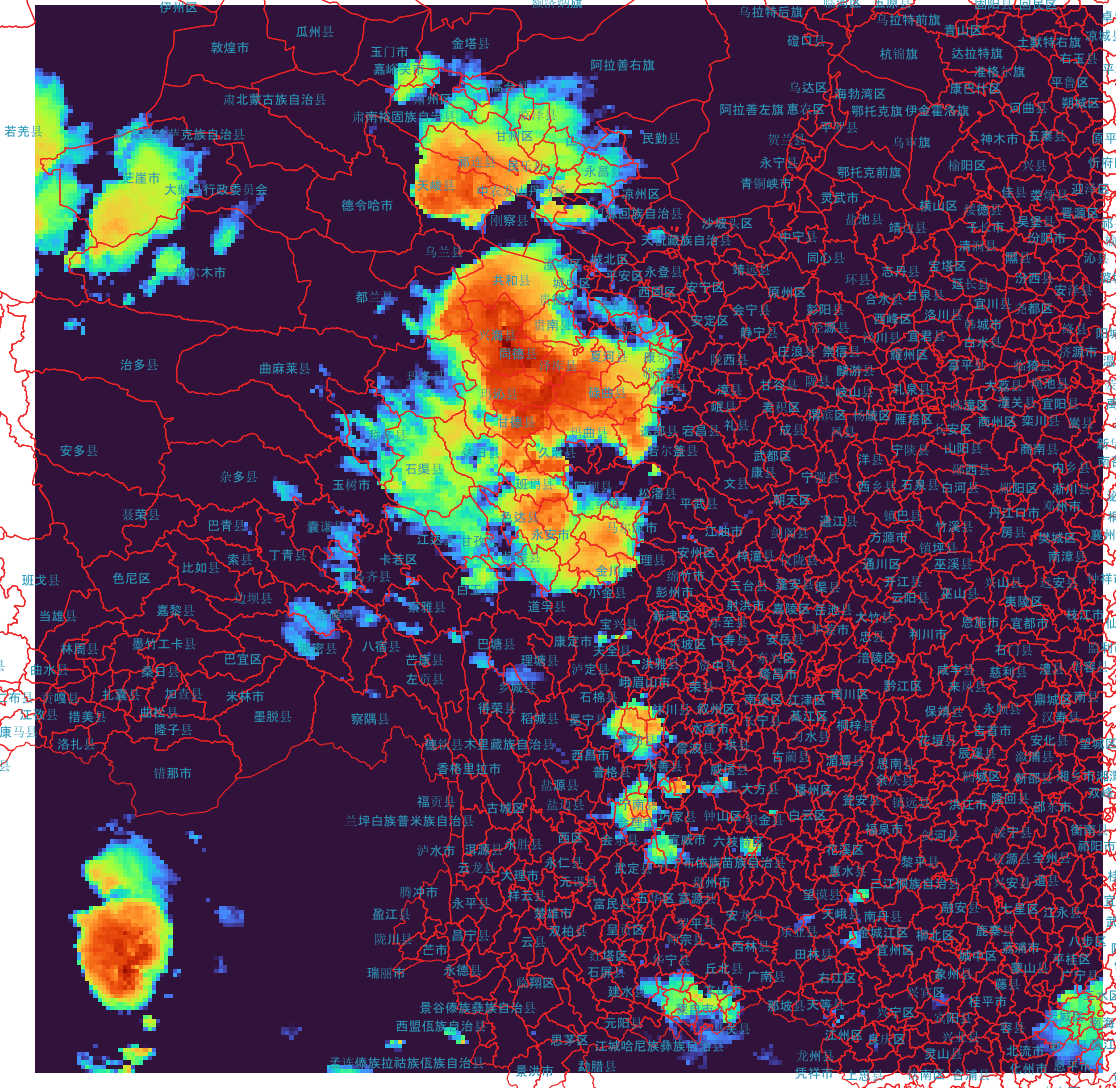

### Lineup Satellite time and Precip List
- Himawari Satellite time is UTC  20240829121000 UTC --> 20240829081000 EDT ---> 20240829201000 BJT
- 中央气象台降水量实况是北京时间     20240829201000

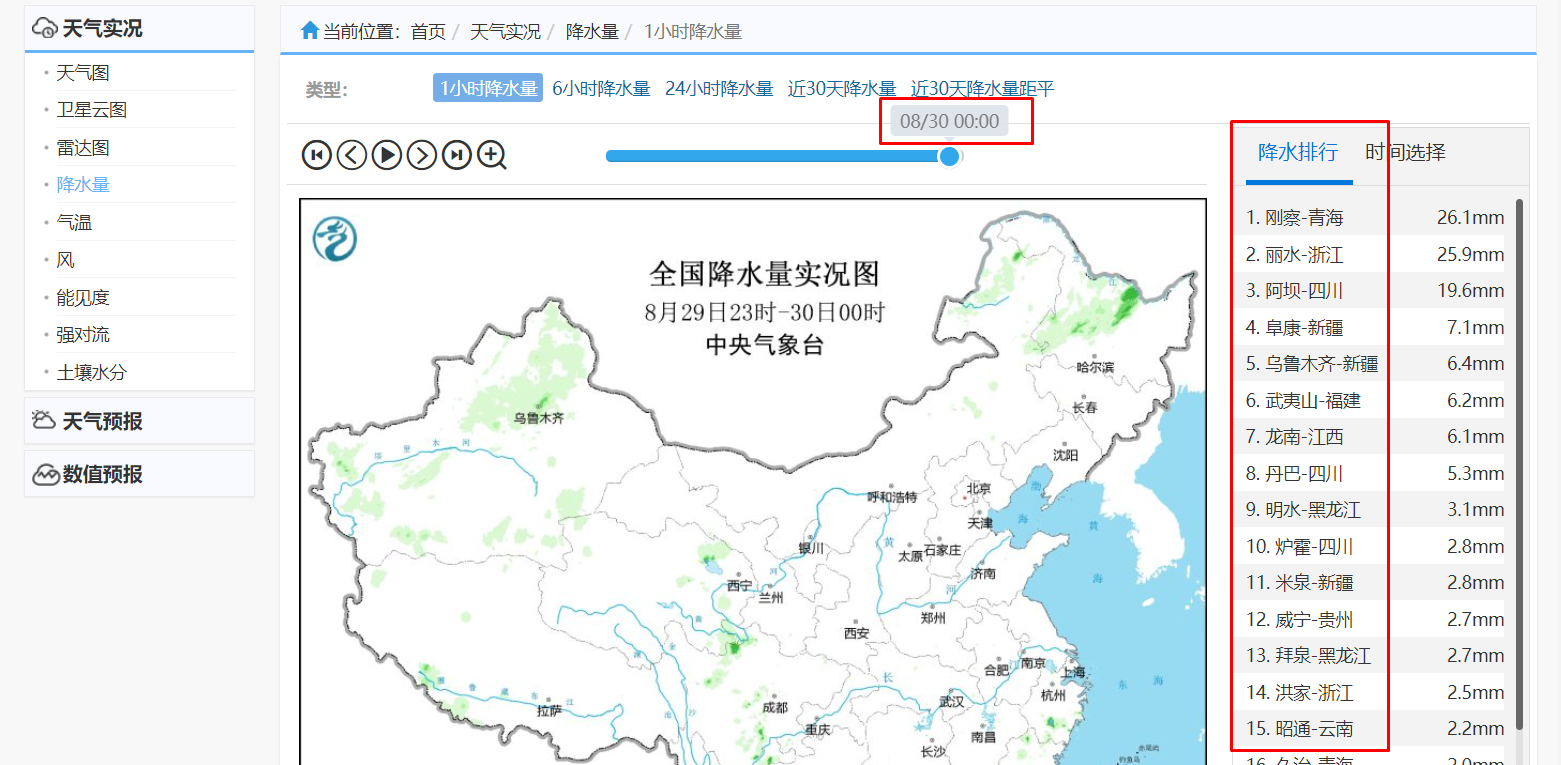